In [21]:
import pandas as pd
df_train = pd.read_csv("~/Downloads/titanic/train.csv")
df_test = pd.read_csv("~/Downloads/titanic/test.csv")

X_train = pd.get_dummies(df_train[["Sex","Age","SibSp","Parch","Fare","Embarked"]],columns=["Embarked","Sex"], drop_first=True).fillna(0)
y_train = df_train[["Pclass"]]["Pclass"]

X_test= pd.get_dummies(df_test[["Sex","Age","SibSp","Parch","Fare","Embarked"]],columns=["Embarked","Sex"], drop_first=True).fillna(0)
y_test = df_test[["Pclass"]]["Pclass"]


display(X_train.head(),y_train.head())
display(X_test.head(),y_test.head())


,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,22.0,1,0,7.2500,0,1,1
1,38.0,1,0,71.2833,0,0,0
2,26.0,0,0,7.9250,0,1,0
3,35.0,1,0,53.1000,0,1,0
4,35.0,0,0,8.0500,0,1,1


0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,34.5,0,0,7.8292,1,0,1
1,47.0,1,0,7.0000,0,1,0
2,62.0,0,0,9.6875,1,0,1
3,27.0,0,0,8.6625,0,1,1
4,22.0,1,1,12.2875,0,1,0


0    3
1    3
2    2
3    3
4    3
Name: Pclass, dtype: int64

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier

# Models
svmCLS = SVC(kernel="sigmoid",probability=True, gamma="auto", C=100)
lsrCLS = LogisticRegression(solver="lbfgs", max_iter=1000)
rforest = RandomForestClassifier(n_estimators=10)
rforest50 = RandomForestClassifier(n_estimators=20)

# Strategies
classifiers = [
    {"name":"SVM-v1 1v1", "cls": OneVsOneClassifier(svmCLS) },
    {"name":"Logistic 1v1", "cls": OneVsOneClassifier(lsrCLS) },
    {"name":"RandomForest 1v1", "cls": OneVsOneClassifier(rforest) },
    {"name":"SVM-v1 1v-all", "cls": OneVsRestClassifier(svmCLS) },
    {"name":"Logistic 1v-all", "cls": OneVsRestClassifier(lsrCLS) },
    {"name":"RandomForest 1v-all", "cls": OneVsRestClassifier(rforest) },
    {"name":"RandomForest50 1v-all", "cls": OneVsRestClassifier(rforest50) }
]

# Train Phase
for cls in classifiers:
    classifier = cls["cls"]
    clsName = cls["name"]
    classifier.fit(X_train, y_train)
    score = classifier.score(X_test, y_test)
    print("{}\t\t{}".format(score,clsName))

0.35167464114832536		SVM-v1 1v1
0.8157894736842105		Logistic 1v1
0.916267942583732		RandomForest 1v1
0.35645933014354064		SVM-v1 1v-all
0.7751196172248804		Logistic 1v-all
0.9282296650717703		RandomForest 1v-all
0.9210526315789473		RandomForest50 1v-all


In [23]:
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels
import numpy as np

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

3    491
1    216
2    184
Name: Pclass, dtype: int64
Normalized confusion matrix
[[0.90654206 0.08411215 0.00934579]
 [0.07526882 0.80645161 0.11827957]
 [0.00458716 0.01834862 0.97706422]]


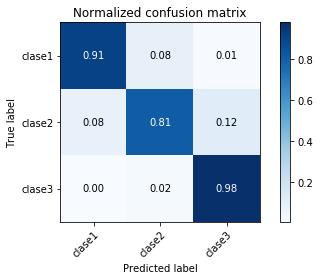

In [24]:
from sklearn.metrics import confusion_matrix

rf = classifiers[-1]["cls"]
y_predict = rf.predict(X_test)
classes = pd.Series(index=set(y_test),data=["clase1","clase2","clase3"])
print(y_train.value_counts())
plot_confusion_matrix(y_test,y_predict,classes, normalize=True)

In [25]:
classifiers[-1]["cls"].estimators_[0].estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=273336323, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1614117659, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_wei

In [26]:
import os, six, pydot
from sklearn.tree import export_graphviz
from sklearn import tree

dotfile = six.StringIO() 
i_tree = 0
for tree_in_forest in classifiers[-1]["cls"].estimators_[0]:
    export_graphviz(tree_in_forest, feature_names=X_train.columns, filled=True, rounded=True,
                   out_file="somefile.dot")
    (graph,) = pydot.graph_from_dot_file('somefile.dot')
    graph.write_png('somefile.png')